In [1]:
# Import starting modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, requests, io
from tqdm import tqdm_notebook as tqdm

In [2]:
# Set relevant options

%matplotlib inline
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)
pd.options.display.max_columns=100
pd.options.display.max_rows=100
sns.set_style("whitegrid")
sns.set_context("poster")
np.random.seed(42)

In [3]:
# ignore deprecation warnings in sklearn

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Specify data directory

data_dir = os.path.join(os.path.dirname(os.getcwd()),'data')

In [5]:
# Get solar system data from csv file

df_solar_system = pd.read_csv(os.path.join(data_dir, 'solar_system.csv'), index_col = 0)

In [6]:
# get exoplanet data from API

confirmed_url="https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets"
composite_url="https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=compositepars"
s = requests.get(composite_url).content
df_raw = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [7]:
df_raw.head()

,fpl_hostname,fpl_letter,fpl_name,fpl_discmethod,fpl_disc,fpl_controvflag,fpl_orbper,fpl_orbpererr1,fpl_orbpererr2,fpl_orbperlim,fpl_orbperreflink,fpl_smax,fpl_smaxerr1,fpl_smaxerr2,fpl_smaxlim,fpl_smaxreflink,fpl_eccen,fpl_eccenerr1,fpl_eccenerr2,fpl_eccenlim,fpl_eccenreflink,fpl_bmasse,fpl_bmasseerr1,fpl_bmasseerr2,fpl_bmasselim,fpl_bmassprov,fpl_bmassreflink,fpl_rade,fpl_radeerr1,fpl_radeerr2,fpl_radelim,fpl_radreflink,fpl_dens,fpl_denserr1,fpl_denserr2,fpl_denslim,fpl_densreflink,fpl_eqt,fpl_eqterr1,fpl_eqterr2,fpl_eqtlim,fpl_eqtreflink,fpl_insol,fpl_insolerr1,fpl_insolerr2,fpl_insollim,fpl_insolreflink,ra_str,dec_str,fst_posreflink,...,fst_distreflink,fst_optmag,fst_optmagerr,fst_optmaglim,fst_optmagband,fst_optmagreflink,fst_nirmag,fst_nirmagerr,fst_nirmaglim,fst_nirmagband,fst_nirmagreflink,fst_spt,fst_sptlim,fst_sptreflink,fst_teff,fst_tefferr1,fst_tefferr2,fst_tefflim,fst_teffreflink,fst_logg,fst_loggerr1,fst_loggerr2,fst_logglim,fst_loggreflink,fst_lum,fst_lumerr1,fst_lumerr2,fst_lumlim,fst_lumreflink,fst_mass,fst_masserr1,fst_masserr2,fst_masslim,fst_massreflink,fst_rad,fst_raderr1,fst_raderr2,fst_radlim,fst_radreflink,fst_met,fst_meterr1,fst_meterr2,fst_metlim,fst_metratio,fst_metreflink,fst_age,fst_ageerr1,fst_ageerr2,fst_agelim,fst_agereflink
0,GJ 163,b,GJ 163 b,Radial Velocity,2013,0,8.63182,0.00155,-0.00155,0.0,<a refstr=BONFILS_ET_AL__2013 href=https://ui....,0.0607,0.00001,-0.00001,0.0,<a refstr=BONFILS_ET_AL__2013 href=https://ui....,0.073,0.050,-0.050,0.0,<a refstr=BONFILS_ET_AL__2013 href=https://ui....,10.60,0.60,-0.60,0.0,Msini,<a refstr=BONFILS_ET_AL__2013 href=https://ui....,3.25,NaN,NaN,0.0,<a refstr=CALCULATED_VALUE href=/docs/composit...,1.700,NaN,NaN,0.0,<a refstr=CALCULATED_VALUE href=/docs/composit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04h09m15.67s,-53d22m25.3s,<a refstr=HIPPARCOS_AND_TYCHO_CATALOGS href=ht...,...,<a refstr=GAIA_COLLABORATION_ET_AL__2018 href=...,11.81,0.014,0.0,V (Johnson),<a refstr=LAING_1989 href=https://ui.adsabs.ha...,7.135,0.021,0.0,Ks (2MASS),<a refstr=2MASS_POINT_SOURCE_CATALOG href=http...,M3.5 V,0.0,<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...,3500.0,100.0,-100.0,0.0,<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...,NaN,NaN,NaN,NaN,NaN,-1.708,0.022,-0.023,0.0,<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...,0.40,0.02,-0.02,0.0,<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...,0.43,NaN,NaN,0.0,<a refstr=TURNBULL_2015 href=https://ui.adsabs...,0.10,0.1,-0.1,0.0,[Fe/H],<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...,6.0,4.0,-4.0,0.0,<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...
1,GJ 163,c,GJ 163 c,Radial Velocity,2013,0,25.63058,0.02550,-0.02550,0.0,<a refstr=BONFILS_ET_AL__2013 href=https://ui....,0.1254,0.00010,-0.00010,0.0,<a refstr=BONFILS_ET_AL__2013 href=https://ui....,0.099,0.086,-0.086,0.0,<a refstr=BONFILS_ET_AL__2013 href=https://ui....,6.80,0.90,-0.90,0.0,Msini,<a refstr=BONFILS_ET_AL__2013 href=https://ui....,2.50,NaN,NaN,0.0,<a refstr=CALCULATED_VALUE href=/docs/composit...,2.390,NaN,NaN,0.0,<a refstr=CALCULATED_VALUE href=/docs/composit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04h09m15.67s,-53d22m25.3s,<a refstr=HIPPARCOS_AND_TYCHO_CATALOGS href=ht...,...,<a refstr=GAIA_COLLABORATION_ET_AL__2018 href=...,11.81,0.014,0.0,V (Johnson),<a refstr=LAING_1989 href=https://ui.adsabs.ha...,7.135,0.021,0.0,Ks (2MASS),<a refstr=2MASS_POINT_SOURCE_CATALOG href=http...,M3.5 V,0.0,<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...,3500.0,100.0,-100.0,0.0,<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...,NaN,NaN,NaN,NaN,NaN,-1.708,0.022,-0.023,0.0,<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...,0.40,0.02,-0.02,0.0,<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...,0.43,NaN,NaN,0.0,<a refstr=TURNBULL_2015 href=https://ui.adsabs...,0.10,0.1,-0.1,0.0,[Fe/H],<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...,6.0,4.0,-4.0,0.0,<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...
2,GJ 163,d,GJ 163 d,Radial Velocity,2013,0,603.95116,7.55862,-7.55862,0.0,<a refstr=BON

In [8]:
# What are the characteristics of the dataset?

print(f"There are {df_raw.shape[0]} observations and {df_raw.shape[1]} features. \n")
print(f"The features are: {df_raw.columns.tolist()}. \n")
print(f"There are {df_raw.isnull().sum().values.sum()} missing values. \n")
print(f"The number of unique values for each column is: \n{df_raw.nunique()}.")

There are 4197 observations and 104 features. 

The features are: ['fpl_hostname', 'fpl_letter', 'fpl_name', 'fpl_discmethod', 'fpl_disc', 'fpl_controvflag', 'fpl_orbper', 'fpl_orbpererr1', 'fpl_orbpererr2', 'fpl_orbperlim', 'fpl_orbperreflink', 'fpl_smax', 'fpl_smaxerr1', 'fpl_smaxerr2', 'fpl_smaxlim', 'fpl_smaxreflink', 'fpl_eccen', 'fpl_eccenerr1', 'fpl_eccenerr2', 'fpl_eccenlim', 'fpl_eccenreflink', 'fpl_bmasse', 'fpl_bmasseerr1', 'fpl_bmasseerr2', 'fpl_bmasselim', 'fpl_bmassprov', 'fpl_bmassreflink', 'fpl_rade', 'fpl_radeerr1', 'fpl_radeerr2', 'fpl_radelim', 'fpl_radreflink', 'fpl_dens', 'fpl_denserr1', 'fpl_denserr2', 'fpl_denslim', 'fpl_densreflink', 'fpl_eqt', 'fpl_eqterr1', 'fpl_eqterr2', 'fpl_eqtlim', 'fpl_eqtreflink', 'fpl_insol', 'fpl_insolerr1', 'fpl_insolerr2', 'fpl_insollim', 'fpl_insolreflink', 'ra_str', 'dec_str', 'fst_posreflink', 'fst_dist', 'fst_disterr1', 'fst_disterr2', 'fst_distlim', 'fst_distreflink', 'fst_optmag', 'fst_optmagerr', 'fst_optmaglim', 'fst_optmagba

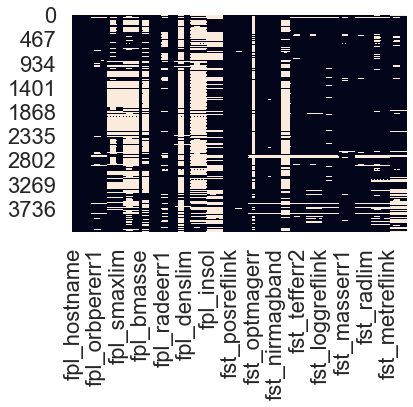

In [9]:
# the heatmap() function from seaborn is a great way to visualize the missingness of your data

sns.heatmap(df_raw.isnull(), cbar=False)

In [10]:
# Let's subset the dataframe to get only the data we need
location_cols = ['ra_str', 'dec_str', 'fst_dist']

planet_stat_cols = ['fpl_name', 'fpl_discmethod', 'fpl_disc', 'fpl_orbper', 
               'fpl_smax', 'fpl_eccen', 'fpl_bmasse', 'fpl_rade', 'fpl_dens',
               'fpl_eqt', 'fpl_insol']

star_stat_cols = ['fpl_hostname','fst_optmag', 'fst_nirmag','fst_spt', 'fst_teff', 'fst_logg', 
                  'fst_lum', 'fst_mass', 'fst_rad', 'fst_met', 'fst_metratio', 'fst_age']

In [11]:
df_exoplanet = df_raw[planet_stat_cols]
df_star = df_raw[star_stat_cols + location_cols]
df_planet = pd.concat([df_exoplanet, df_solar_system[planet_stat_cols]]).reset_index(drop = True)

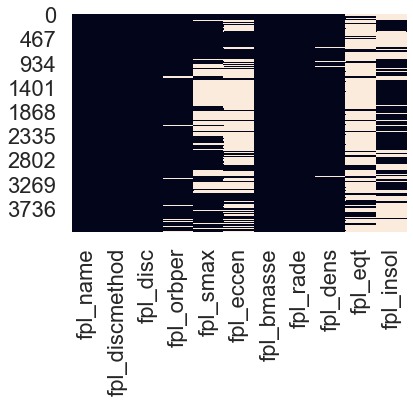

In [12]:
# Let's use sns heat map again to visualize the missingness of the planet data

sns.heatmap(df_exoplanet.isnull(), cbar=False)

In [13]:
# What if I drop every row which has missing data
df_exoplanet.dropna().shape

(267, 11)

# EDA - Visualizing Distance

In [14]:
# Import functions in astropy, which is a popular data analysis package for celestial bodies
# Import plotly, which is used for our spatial map.

from astropy import units as u
from astropy.coordinates import SkyCoord, Distance
import plotly.express as px
import plotly.graph_objects as go

In [15]:
def generate_cartesian_coord(df, ra_col, dec_col, dist_col):
    """
    Take a Pandas dataframe with columns of ra, dec and distance to generate cartesian coordinates in the dataframe
    """
    # Create Skycoord object based on ra, dec and distance
    c = SkyCoord(ra = df[ra_col].tolist(), 
                 dec = df[dec_col].tolist(), 
                 distance = df[dist_col].tolist()*u.kpc)
    
    # Assign cartesian coordinates to columns in dataset
    df['x_cord'] = c.cartesian.x.value
    df['y_cord'] = c.cartesian.y.value
    df['z_cord'] = c.cartesian.z.value
    
    return df

In [25]:
def visualize_distance(df, color_var, zoom_psc, normalize):
    """
    Takes a Pandas dataframe with star data.
    Takes color_var as a string for the variable in the dataframe used as color pallete.
    Takes the condition of how close (in parsec) the stars identified are to the Sun as filter.
    Takes a Boolean for whether or not to normalize the color variable, causing diverging color pallete.
    """
    
    # Drop NAs from dataframe 
    print(f'Data initially has {df.shape[0]} observations.')
    df = df.dropna(subset = ['ra_str', 'dec_str', 'fst_dist', 'fst_rad', color_var])
    print(f'After dropping NAs, data has {df.shape[0]} observations.')
    
    # Generate cartesian coordinates
    df = generate_cartesian_coord(df, 'ra_str', 'dec_str', 'fst_dist')
    
    # Generate log size
    # df['fst_log_rad_add_2'] = np.log10(df['fst_rad']) + 2
    
    # To help the visualization look better, remove stars too far away
    df = df[(df['x_cord'] > - zoom_psc) & (df['x_cord'] < zoom_psc)]
    df = df[(df['y_cord'] > - zoom_psc) & (df['y_cord'] < zoom_psc)]
    df = df[(df['z_cord'] > - zoom_psc) & (df['z_cord'] < zoom_psc)]
    print(f'After limiting distance to within {zoom_psc} parsec of the Solar System, data has {df.shape[0]} observations.')
    
    # Get the normalize for diverging pallete
    if normalize:
        df[(color_var + '_normalized')] = (df[color_var] - min(df[color_var]))/(max(df[color_var])-min(df[color_var]))
    
    # Round to two decimal places for better hover data
    df = df.round(2)
    
    # Generate label dictionary
    if normalize:
        norm_dict = {(color_var + '_normalized'):'Normalized Effective Temperature'}
    else:
        norm_dict = {color_var:'Effective Temperature(K)'}
    
    other_dict = {'x_cord': 'x',
                 'y_cord': 'y',
                 'z_cord': 'z',
                 'fst_dist': 'Distance in pc',
                 'fst_rad': 'Stellar Radius'}
    label_dict = {**norm_dict, **other_dict} 
    
    # Generate visualization
    fig = px.scatter_3d(df, 
                        x = 'x_cord', 
                        y = 'y_cord', 
                        z = 'z_cord',
                        size = 'fst_rad',
                        size_max = 75,
                        #sizeref = 750,
                        color = [(color_var + '_normalized') if normalize else color_var][0],
                        color_continuous_scale = ['portland' if normalize else 'plasma'][0],
                        hover_name = 'fpl_hostname',
                        range_x = [-zoom_psc,zoom_psc],
                        range_y = [-zoom_psc,zoom_psc],
                        range_z = [-zoom_psc,zoom_psc],
                        opacity = 0.7,
                        title = 'Coordinates, Size and Effective Temperature of Stars containing exoplanets',
                        labels = label_dict)
                        
    fig.update_layout(margin=dict(l=0, r=70, b=0, t=70),
                      title_font_size = 25)
    
    fig.write_html(f"Star_Coordinate_Viz{['_Norm' if normalize else ''][0]}.html")
    fig.show()

In [26]:
visualize_distance(df = df_star, 
                   color_var = 'fst_teff', 
                   zoom_psc = 600, 
                   normalize = False)

Data initially has 4197 observations.
After dropping NAs, data has 4053 observations.
After limiting distance to within 600 parsec of the Solar System, data has 3003 observations.


# Seaborn Visualizations

# Plot planet of the solar system against background of exoplanets 

plt.figure(figsize=(15,10))
sns.scatterplot('fpl_rade','fpl_bmasse', 
                data = df_planet.drop(df_planet[df_planet.fpl_rade > 50].index),
                hue = 'fpl_discmethod',
                alpha =0.2).set(yscale = 'log')
sns.scatterplot('fpl_rade','fpl_bmasse', 
                data = df_solar_system,
                marker = 's',
               hue = 'fpl_name').set(yscale = 'log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Earth Radii')
plt.ylabel('Earth Mass')
plt.title("Exoplanet size & mass scatterplot")
plt.show()

df_planet[(df_planet.fpl_rade > 2) & 
          (df_planet.fpl_rade < 3) &
          (df_planet.fpl_bmasse > 1000)]

# Plot planet of the solar system against background of exoplanets 

plt.figure(figsize=(15,10))
sns.scatterplot('fpl_smax','fpl_bmasse', 
                data = df_planet,
                hue = 'fpl_discmethod',
                alpha =0.4).set(xscale = 'log', yscale = 'log')
sns.scatterplot('fpl_smax','fpl_bmasse', 
                data = df_solar_system,
                marker = 's',
                hue = 'fpl_name').set(xscale = 'log', yscale = 'log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Earth Mass')
plt.title("Exoplanet SMAX & mass scatterplot")
plt.show()

# Plot planet of the solar system against background of exoplanets 

plt.figure(figsize=(15,10))
sns.scatterplot('fpl_orbper','fpl_eccen', 
                data = df_planet,
                hue = 'fpl_discmethod',
                alpha =0.4).set(xscale = 'log')
sns.scatterplot('fpl_orbper','fpl_eccen', 
                data = df_solar_system,
                marker = 's',
                hue = 'fpl_name').set(xscale = 'log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Orbital Period in days')
plt.ylabel('Eccentricity')
plt.title("Orbital period vs Eccentricity scatterplot")
plt.show()

# Plot planet of the solar system against background of exoplanets 

plt.figure(figsize=(15,10))
sns.scatterplot('fpl_smax','fpl_eqt', 
                data = df_planet,
                hue = 'fpl_discmethod',
                alpha =0.4).set(xscale = 'log', yscale = 'log')
sns.scatterplot('fpl_smax','fpl_eqt', 
                data = df_solar_system,
                marker = 's',
                hue = 'fpl_name').set(xscale = 'log', yscale = 'log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('SMAX (AU)')
plt.ylabel('Equilibrium Temperature (K)')
plt.title("SMAX vs Equilibrium Temperature scatterplot")
plt.show()

## Bokeh Visualizations

In [18]:
# We'll use Bokeh to create a visualization

from bokeh.io import output_notebook, show, save
from bokeh.models.annotations import Title
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models.widgets import Panel, Tabs
from bokeh.palettes import Category20_20, Accent
from bokeh.transform import factor_cmap, factor_mark
output_notebook()

Loading BokehJS ...

In [19]:
# import display functions and interactive tools

from IPython.display import HTML
from IPython.display import display
tools = "pan, wheel_zoom, box_zoom,box_select, undo, crosshair"

In [20]:
# Define important variables

variable_def = {'fpl_orbper': {'unit' : 'days', 
                               'name' : 'Orbital Period'},
               'fpl_smax': {'unit' : 'AU', 
                            'name' : 'Semi-Major Axis'},
               'fpl_eccen': {'unit' : '0 to 1', 
                             'name' : 'Eccentricity'},
               'fpl_bmasse': {'unit' : 'Earth Masses', 
                              'name' : 'Body Mass'},
               'fpl_rade': {'unit' : 'Earth Radii', 
                            'name' : 'Radius'},
               'fpl_dens': {'unit' : 'g/cm3', 
                            'name' : 'Density'},
               'fpl_eqt': {'unit' : 'K', 
                           'name' : 'Equilibrium Temperature'}}

In [21]:
# Create a function to generate tabs
def create_tab(exo_df, solar_df, xvar, yvar, log_scale_x, log_scale_y, hue):
    """
    Create a scatterplot between two variables, along with data point from the solar system
    """
    # Get dataframe
    exo_data = exo_df.copy()
    solar_data = solar_df.copy()
    
    # Remove all missing values
    exo_data = exo_data.dropna(subset = [xvar, yvar, hue])
    
    # Remove outlier
    exo_data = exo_data[exo_data['fpl_rade'] < 40]
    
    # Save mass and size values for hovertool
    exo_data['fpl_bmasse_lin'] = exo_data['fpl_bmasse']
    exo_data['fpl_rade_lin'] = exo_data['fpl_rade']
    solar_data['fpl_bmasse_lin'] = solar_data['fpl_bmasse']
    solar_data['fpl_rade_lin'] = solar_data['fpl_rade']
    
    # Log transform if needed
    if log_scale_x:
        exo_data[xvar] = np.log10(exo_data[xvar])
        solar_data[xvar] = np.log10(solar_data[xvar])
    if log_scale_y:
        exo_data[yvar] = np.log10(exo_data[yvar])
        solar_data[yvar] = np.log10(solar_data[yvar])
    
    # Create Figure Plot
    p = figure(tools=tools,
               plot_width= 1000, plot_height= 700,
               title = 'Scatterplot for %s versus %s' % (variable_def[xvar]['name'], 
                                                         variable_def[yvar]['name']),
               x_axis_label = '%s in %s %s' % (variable_def[xvar]['name'], 
                                               ["Log" if log_scale_x else ""][0],
                                               variable_def[xvar]['unit']),
               y_axis_label = '%s in %s %s' % (variable_def[yvar]['name'], 
                                               ["Log" if log_scale_y else ""][0], 
                                               variable_def[yvar]['unit']))
    #p.grid.grid_line_color = None
    
    # Set color and data source
    factor = exo_data[hue]
    
    source = ColumnDataSource(data=dict(x = exo_data[xvar], 
                                        y = exo_data[yvar],
                                        mass = exo_data['fpl_bmasse_lin'],
                                        size = exo_data['fpl_rade_lin'],
                                        name = exo_data['fpl_name'],
                                        legend = exo_data[hue],
                                        ur = factor))
    
    colors = factor_cmap('ur', palette = Category20_20, factors = factor.unique()) 
    
    # Draw scatter graph with exoplanet data
    p.scatter(source=source,
                  x= 'x',
                  y= 'y',
                  marker="circle",
                  alpha = 0.9,
                  fill_color=colors,
                  line_color=colors,
                  legend = 'legend')
    
    
    
    # Draw scatter graph with solar_system data
    name = solar_data['fpl_name']

    source = ColumnDataSource(data=dict(x = solar_data[xvar], 
                                        y = solar_data[yvar],
                                        mass = solar_data['fpl_bmasse_lin'],
                                        size = solar_data['fpl_rade_lin'],
                                        name = solar_data['fpl_name'],
                                        legend = solar_data['fpl_name'],
                                        ur = name))

    colors = factor_cmap('ur', palette = Accent[8], factors = name.unique()) 

    p.triangle(source=source,
                  x='x',
                  y='y',
                  alpha = 1,
                  size = 17,
                  fill_color=colors,
                  line_color=colors)
    
    p.legend.click_policy="hide"
    # Add tool-tips so the users can see information when selecting a particular planet
    p.add_tools(
        HoverTool(
            tooltips=[('Planet Name', '@name'),
                      ('Mass (EM)', '@mass{2.2f}'),
                     ('Radius (ER)','@size{2.2f}')]#,renderers=[p1]
        )
    )

    # Create tab with the plot we just generated
    tab = Panel(child=p, title = '%s - %s' % (variable_def[xvar]['name'], 
                                             variable_def[yvar]['name']),)
    
    return tab

In [22]:
# Generate argument values
x_list = ['fpl_rade', 'fpl_smax' , 'fpl_orbper', 'fpl_smax']
x_scale_list = [False, True, True, True]
y_list = ['fpl_bmasse', 'fpl_bmasse', 'fpl_eccen', 'fpl_eqt']
y_scale_list = [True, True, False, True]

In [23]:
# Generate tabs in tab list
tab_list = []
for tab_idx in range(4):
    tab_list.append(create_tab(df_planet,
                               df_solar_system,
                               x_list[tab_idx], 
                               y_list[tab_idx], 
                               x_scale_list[tab_idx],
                               y_scale_list[tab_idx],
                               'fpl_discmethod'))

In [24]:
# Generate Master plot and show the figure
tabs = Tabs(tabs = tab_list)    
   
show(tabs)

save(tabs, filename='Pair-wise_exoplanet_characteristic.html')